# Data Analysis
In this notebook we will pull our raw data from ```raw_data``` and perform some analysis. 

For the purpose of this project we will be looking for the deviation in price for different ```targets```.

A target is essentially how far we are projecting - what the model will learn to classify given a certain time window. 

Therefor if our window size is 15, and our target is 3. We will label the window buy or sell depending on a percentage change from the close of the 15th and opening of the 18th (in this case). 

## Default 
By default, our window_size is 15 and our target_size is 3, therefore we are trying to predict the 18th window. 

In our default example each timestep is of 1hr intervals. Therefor our window is 15 hours and our target is 3 hours. We are trying to predict 3 hours into the future.

## Our Process
We will take the entire time-series of data and perform a **window roll** operation to formulate a dataset into a pandas dataframe object

In [1]:
from omega_analysis import *
import matplotlib.pyplot as plt

In [2]:
# grabbing our data
file = f'{os.curdir}/raw_data'
file = f'{file}/{os.listdir(file)[0]}'

In [3]:
# loading into a dataframe
headers = ['date', 'complete', 'open', 'high', 'low', 'close', 'volume']

my_dtypes = {
    'date': 'str',
    'complete': 'bool',
    'open': 'float',
    'high': 'float',
    'low': 'float',
    'close': 'float',
    'volume': 'float'
}

my_parse_dates = ['date']

df = pd.read_csv(file, names=headers, dtype=my_dtypes, parse_dates=my_parse_dates)

# dropping everything but open, close, date
df.drop(columns=['complete', 'low', 'high', 'volume'], axis=1, inplace=True)

In [4]:
changes_df = return_open_close_range_change(df, range_=48)

In [5]:
changes_df.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,-0.000014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.000088,-0.000075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000584,0.000054,0.000068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000727,0.000041,-0.000489,-0.000475,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.000007,0.000041,-0.000645,-0.001174,-0.00116,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
changes_df = pd.concat([df, changes_df], axis=1)

In [7]:
# Let's check our data
summary = changes_df.describe()

In [8]:
summary

,open,close,1,2,3,4,5,6,7,8,...,39,40,41,42,43,44,45,46,47,48
count,12408.000000,12408.000000,1.240800e+04,12407.000000,12406.000000,12405.000000,12404.000000,12403.000000,12402.000000,12401.000000,...,12370.000000,12369.000000,12368.000000,12367.000000,12366.000000,12365.000000,12364.000000,12363.000000,12362.000000,12361.000000
mean,1.322025,1.322026,-1.820264e-07,-0.000008,-0.000014,-0.000020,-0.000026,-0.000032,-0.000037,-0.000043,...,-0.000233,-0.000239,-0.000245,-0.000251,-0.000257,-0.000263,-0.000270,-0.000276,-0.000282,-0.000288
std,0.073317,0.073301,1.418745e-03,0.000291,0.001447,0.002059,0.002540,0.002943,0.003305,0.003591,...,0.008936,0.009057,0.009177,0.009297,0.009415,0.009531,0.009647,0.009763,0.009876,0.009989
min,1.200170,1.202160,-2.120813e-02,-0.018088,-0.057246,-0.066353,-0.073906,-0.087332,-0.096148,-0.103749,...,-0.119768,-0.122953,-0.120127,-0.119381,-0.123592,-0.119421,-0.119554,-0.122706,-0.121887,-0.119568
25%,1.263267,1.263320,-5.297214e-04,-0.000030,-0.000521,-0.000745,-0.000948,-0.001092,-0.001258,-0.001423,...,-0.004586,-0.004667,-0.004743,-0.004771,-0.004838,-0.004882,-0.004925,-0.004979,-0.005059,-0.005161
50%,1.307210,1.307165,-1.386396e-05,0.000000,0.000003,-0.000008,0.000000,0.000000,0.000000,0.000000,...,0.000037,0.000048,0.000041,0.000070,0.000066,0.000056,0.000015,0.000008,-0.000003,-0.000021
75%,1.352313,1.352285,5.070649e-04,0.000016,0.000523,0.000728,0.000901,0.001056,0.001220,0.001389,...,0.004482,0.004621,0.004654,0.004743,0.004798,0.004853,0.004938,0.005026,0.005078,0.005152
max,1.500760,1.500740,6.071360e-02,0.007933,0.021821,0.022490,0.032059,0.039300,0.039592,0.034474,...,0.038853,0.037738,0.036339,0.036649,0.041054,0.041839,0.040872,0.039847,0.040630,0.041242


In [21]:
summary.loc['std'].sort_values(ascending=True)

2     0.000386
1     0.001896
3     0.001948
4     0.002788
5     0.003450
6     0.004010
7     0.004517
8     0.004914
9     0.005265
10    0.005572
11    0.005884
12    0.006182
13    0.006479
14    0.006765
15    0.007059
16    0.007337
17    0.007596
18    0.007842
19    0.008084
20    0.008312
21    0.008548
22    0.008786
23    0.009026
24    0.009276
25    0.009522
26    0.009759
27    0.009994
28    0.010220
29    0.010430
30    0.010633
31    0.010828
32    0.011011
33    0.011193
34    0.011376
35    0.011563
36    0.011749
37    0.011928
38    0.012105
39    0.012285
40    0.012457
41    0.012625
42    0.012795
43    0.012962
44    0.013124
45    0.013288
46    0.013450
47    0.013611
48    0.013770
Name: std, dtype: float64

In [57]:
summary.loc['mean'].sort_values(ascending=True)

48   -4.759930e-04
47   -4.657636e-04
46   -4.555763e-04
45   -4.454723e-04
44   -4.353813e-04
43   -4.254132e-04
42   -4.153368e-04
41   -4.052733e-04
40   -3.951961e-04
39   -3.853274e-04
38   -3.755040e-04
37   -3.655189e-04
36   -3.554166e-04
35   -3.450792e-04
34   -3.346626e-04
33   -3.242817e-04
32   -3.139953e-04
31   -3.035943e-04
30   -2.933516e-04
29   -2.830145e-04
28   -2.727663e-04
27   -2.625133e-04
26   -2.522200e-04
25   -2.419436e-04
24   -2.314727e-04
23   -2.211917e-04
22   -2.110002e-04
21   -2.009098e-04
20   -1.909363e-04
19   -1.809774e-04
18   -1.707643e-04
17   -1.604535e-04
16   -1.499960e-04
15   -1.394965e-04
14   -1.291279e-04
13   -1.187819e-04
12   -1.084972e-04
11   -9.840136e-05
10   -8.853295e-05
9    -7.875806e-05
8    -6.893315e-05
7    -5.933559e-05
6    -4.973071e-05
5    -4.009836e-05
4    -3.039258e-05
3    -2.056747e-05
2    -1.062545e-05
1    -7.059961e-07
Name: mean, dtype: float64

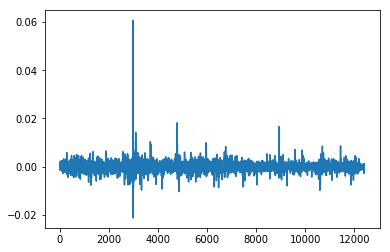

In [9]:
plt.plot(changes_df[1])

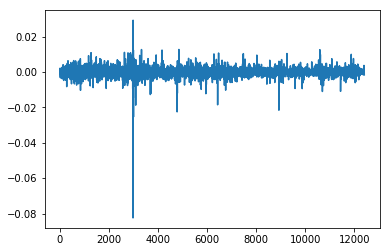

In [40]:
plt.plot(changes_df[3])

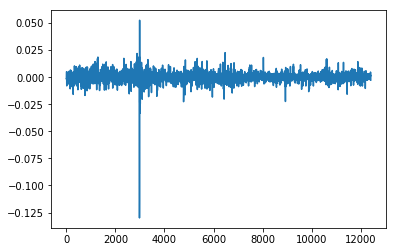

In [42]:
plt.plot(changes_df[6])

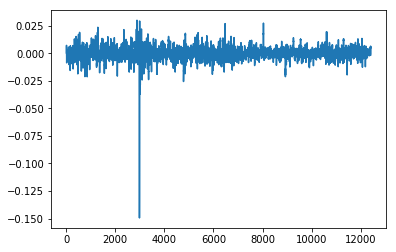

In [41]:
plt.plot(changes_df[10])

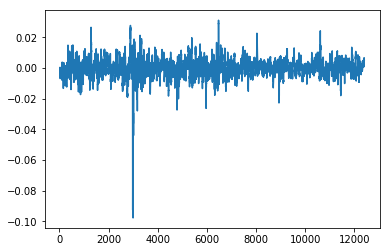

In [10]:
plt.plot(changes_df[24])

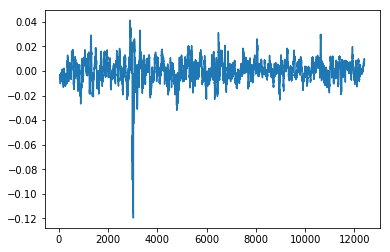

In [11]:
plt.plot(changes_df[48])

[]

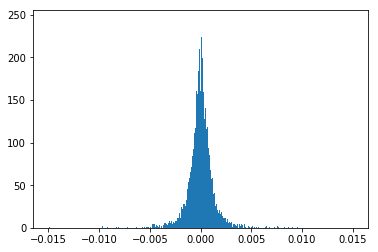

In [14]:
plt.hist(changes_df[3], bins=1000, range=(-0.015, 0.015))
plt.plot()

[]

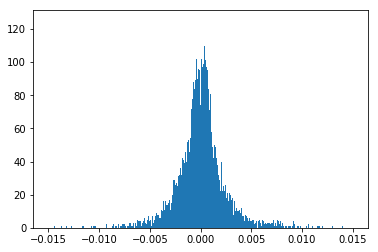

In [15]:
plt.hist(changes_df[6], bins=1000, range=(-0.015, 0.015))
plt.plot()

[]

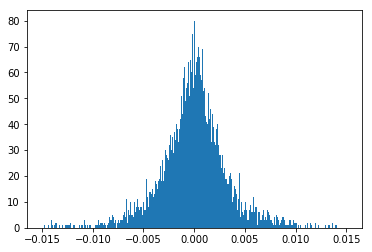

In [16]:
plt.hist(changes_df[10], bins=1000, range=(-0.015, 0.015))
plt.plot()

[]

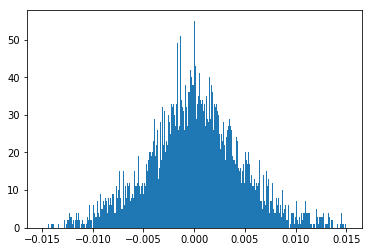

In [17]:
plt.hist(changes_df[20], bins=1000, range=(-0.015, 0.015))
plt.plot()

[]

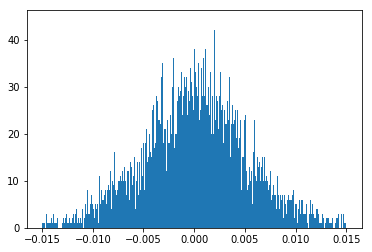

In [18]:
plt.hist(changes_df[24], bins=1000, range=(-0.015, 0.015))
plt.plot()

[]

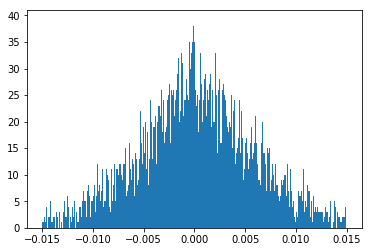

In [19]:
plt.hist(changes_df[30], bins=1000, range=(-0.015, 0.015))
plt.plot()

[]

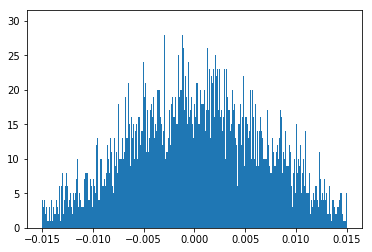

In [20]:
plt.hist(changes_df[48], bins=1000, range=(-0.015, 0.015))
plt.plot()

[]

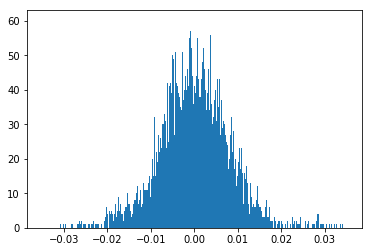

In [21]:
plt.hist(changes_df[48], bins=1000, range=(-0.035, 0.035))
plt.plot()

In [ ]:
# Measuring len within certain time frames

# Experimental
Let's assume we get every win every trade with a **1%** return in a **24 hour window**. 

Given the distribution above, we can see in a 24 hour window, there can be a large distribution of gains and lossses. 

Let's count the exact number of times the price does in fact increase **1%**

In our ```changes_df``` the columns represent x_hours window size. 

In [22]:
window_24 = changes_df[24]

In [23]:
mask = window_24 > 0.01
larger_than_1 = window_24[mask].count()

In [24]:
larger_than_1

506

In [25]:
larger_than_1 / window_24.count()

0.040855874041178845

In [26]:
window_24[mask]

348      0.011544
349      0.010303
350      0.013416
351      0.014915
352      0.013754
353      0.010657
417      0.010996
497      0.010308
498      0.010068
499      0.010096
500      0.010239
501      0.010638
502      0.013978
503      0.014520
504      0.013338
505      0.012370
506      0.012132
507      0.011458
508      0.012086
509      0.012032
510      0.010649
514      0.010740
544      0.010260
545      0.011660
546      0.012575
547      0.010259
548      0.011517
549      0.015067
550      0.013316
551      0.013094
           ...   
10628    0.013258
10629    0.013874
10630    0.011872
10631    0.014078
10632    0.014689
10633    0.014035
10634    0.014038
10635    0.014205
10636    0.014177
10637    0.013465
10638    0.011461
10639    0.011241
11100    0.010061
11101    0.011200
11102    0.010389
11103    0.010727
11104    0.011069
11296    0.010352
11305    0.010037
11306    0.010619
11307    0.010569
11308    0.010211
11309    0.010605
11310    0.010380
11312    0

In [43]:
import os
os.mkdir('./post_processing/data_fluc')

In [27]:
changes_names = 'changes_1hr_USDGBP.csv'
changes_df.to_csv(path_or_buf=f'./post_processing/data_fluc/{changes_names}', index=False)

[]

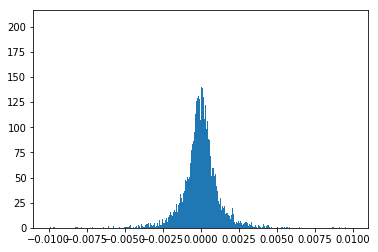

In [48]:
plt.hist(df['change'], bins=1000, range=(-0.01, 0.01))
plt.plot()